In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**Analyzing data**

In [257]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Finding unique values of non numeric entries to find categories**

In [258]:
print(df['aspiration'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginelocation'].unique())
print(df['enginetype'].unique())
print(df['cylindernumber'].unique())
print(df['fuelsystem'].unique())

['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


**Converting non numeric to numeric**

In [259]:
# --- Binary features ---
# These can be converted to 0/1 directly
binary_cols = ['fueltype','aspiration', 'doornumber', 'enginelocation']

# Mapping binary features manually
binary_mappings = {
    'fueltype':{'gas':1, 'diesel':0},
    'aspiration': {'std': 0, 'turbo': 1},
    'doornumber': {'two': 0, 'four': 1},
    'enginelocation': {'front': 0, 'rear': 1}
}

for col in binary_cols:
    df[col] = df[col].map(binary_mappings[col])  # Convert binary to 0/1

# --- Ordinal feature ---
# Assuming more cylinders generally increase car performance/price
# So we can map them to ordinal integers
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)

# --- One-hot encoding features ---
# List of columns to one-hot encode
one_hot_cols = ['carbody', 'drivewheel', 'enginetype', 'fuelsystem']

for col in one_hot_cols:
    # Create dummies with prefix = column name
    dummies = pd.get_dummies(df[col], prefix=col, dtype='int8')
    
    # Drop the first column to avoid dummy variable trap
    dummies = dummies.iloc[:, 1:]
    
    # Merge dummies with original df
    df = pd.concat([df, dummies], axis=1)
    
    # Drop original column
    df.drop(col, axis=1, inplace=True)

df.drop(['CarName','car_ID'], axis=1, inplace=True)
df.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


**Correlation matrix**

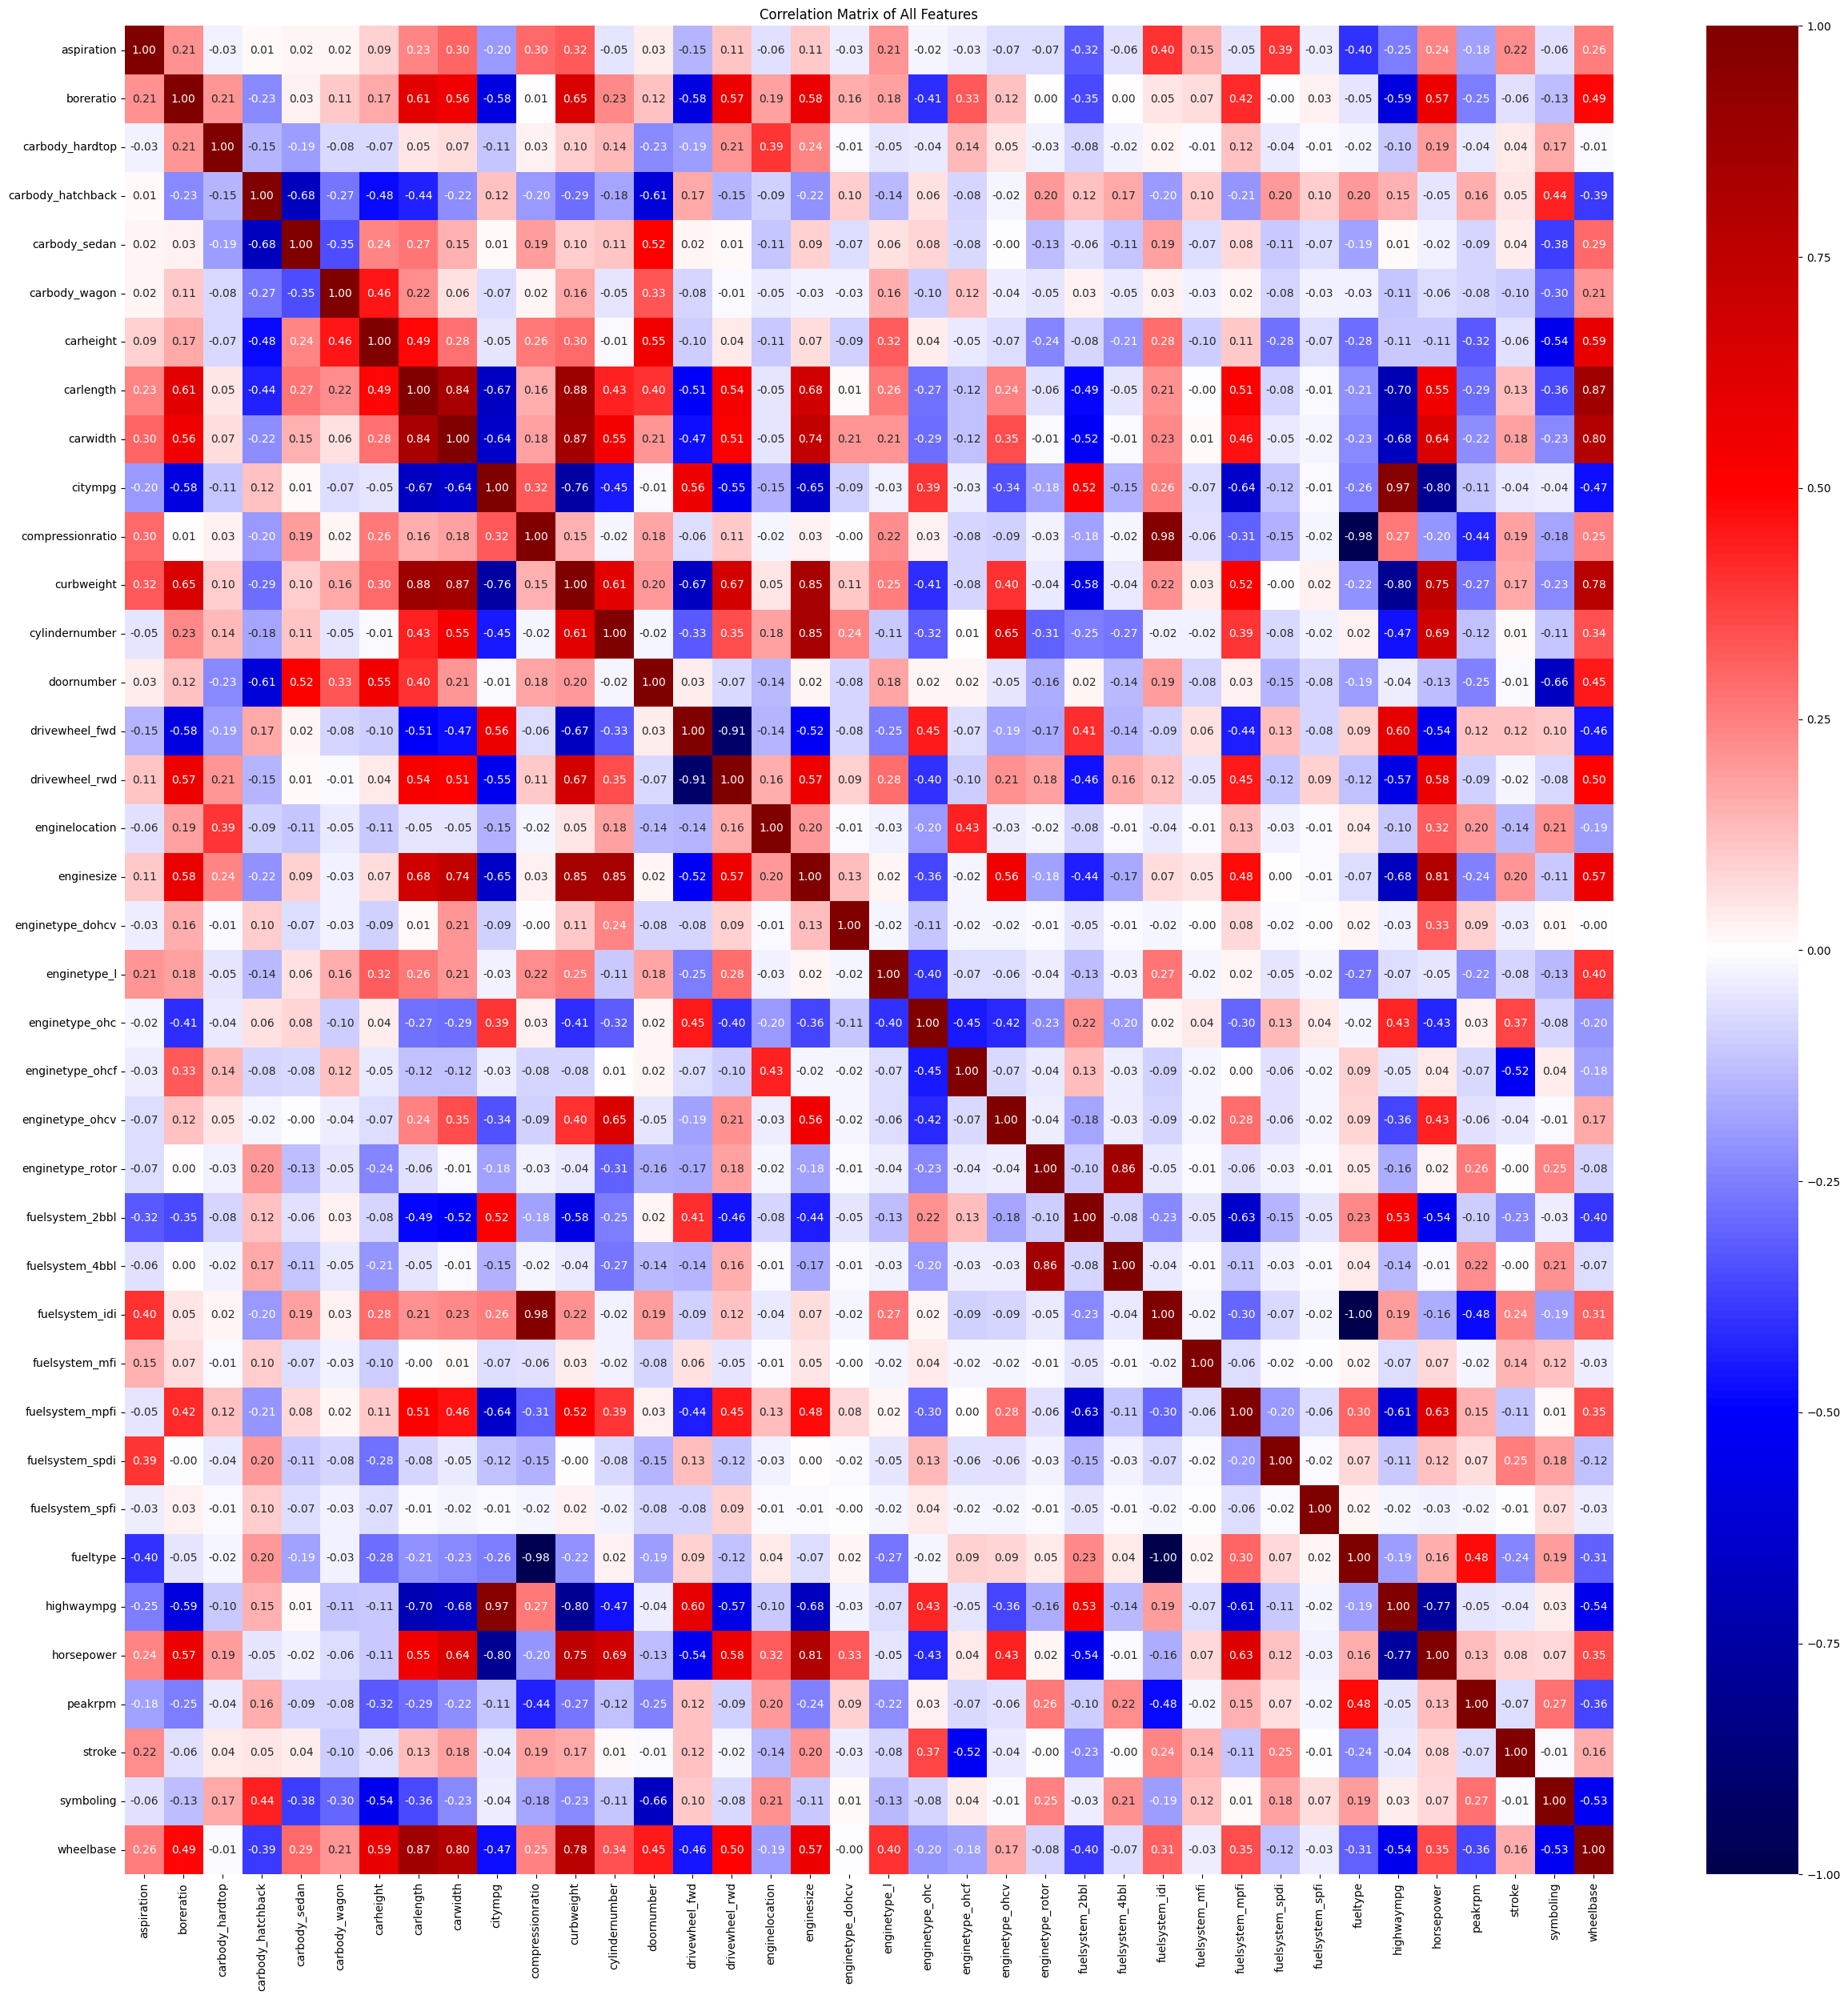

In [260]:
# --- Compute correlation matrix ---
corr_matrix = corr_matrix = df[df.columns.difference(['price'])].corr()

# --- Display heatmap emphasizing strong correlations (both negative and positive) ---
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="seismic", center=0, vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix of All Features")
plt.show()


from the above we can see strong correlation 
 1. fueltype vs fuelsystem_idi (-1) → drop one (fuelsystem_idi)
 2. fueltype vs compressionratio (-0.984) → keep compressionratio, drop fueltype
 3. merge car ht,wt, width and weight into one
 4. citympg vs highwaympg (~0.95) → drop citympg
 5. compressionratio vs fuelsystem_idi (0.984) → already handled


In [261]:
#dealing with multicollinearity

# Create cardensity
df['cardensity'] = df['curbweight'] / (df['carlength'] * df['carwidth'] * df['carheight'])
# Keep only cardensity and wheelbase
df = df.drop(['curbweight','carlength','carwidth','carheight'], axis=1)

#compression ratio 
df = df.drop(['fueltype', 'fuelsystem_idi'], axis=1)

# Drop citympg since it's highly correlated with highwaympg
df = df.drop(['citympg'], axis=1)


In [262]:
low_corr_features = corr_with_price[abs(corr_with_price) < 0.12].sort_values()
print(low_corr_features)

peakrpm            -0.085267
symboling          -0.079978
fuelsystem_spdi    -0.061475
carbody_wagon      -0.042310
fuelsystem_spfi    -0.019580
fuelsystem_4bbl    -0.017306
enginetype_rotor   -0.004544
fuelsystem_mfi     -0.002747
enginetype_ohcf     0.016285
doornumber          0.031835
enginetype_l        0.042267
compressionratio    0.067984
stroke              0.079443
Name: price, dtype: float64


In [263]:
# 1. Make a list of low-correlation features
low_corr = corr_with_price[abs(corr_with_price) < 0.1].index.tolist()

# 2. Drop them only if you're using linear regression
df= df.drop(columns=low_corr)




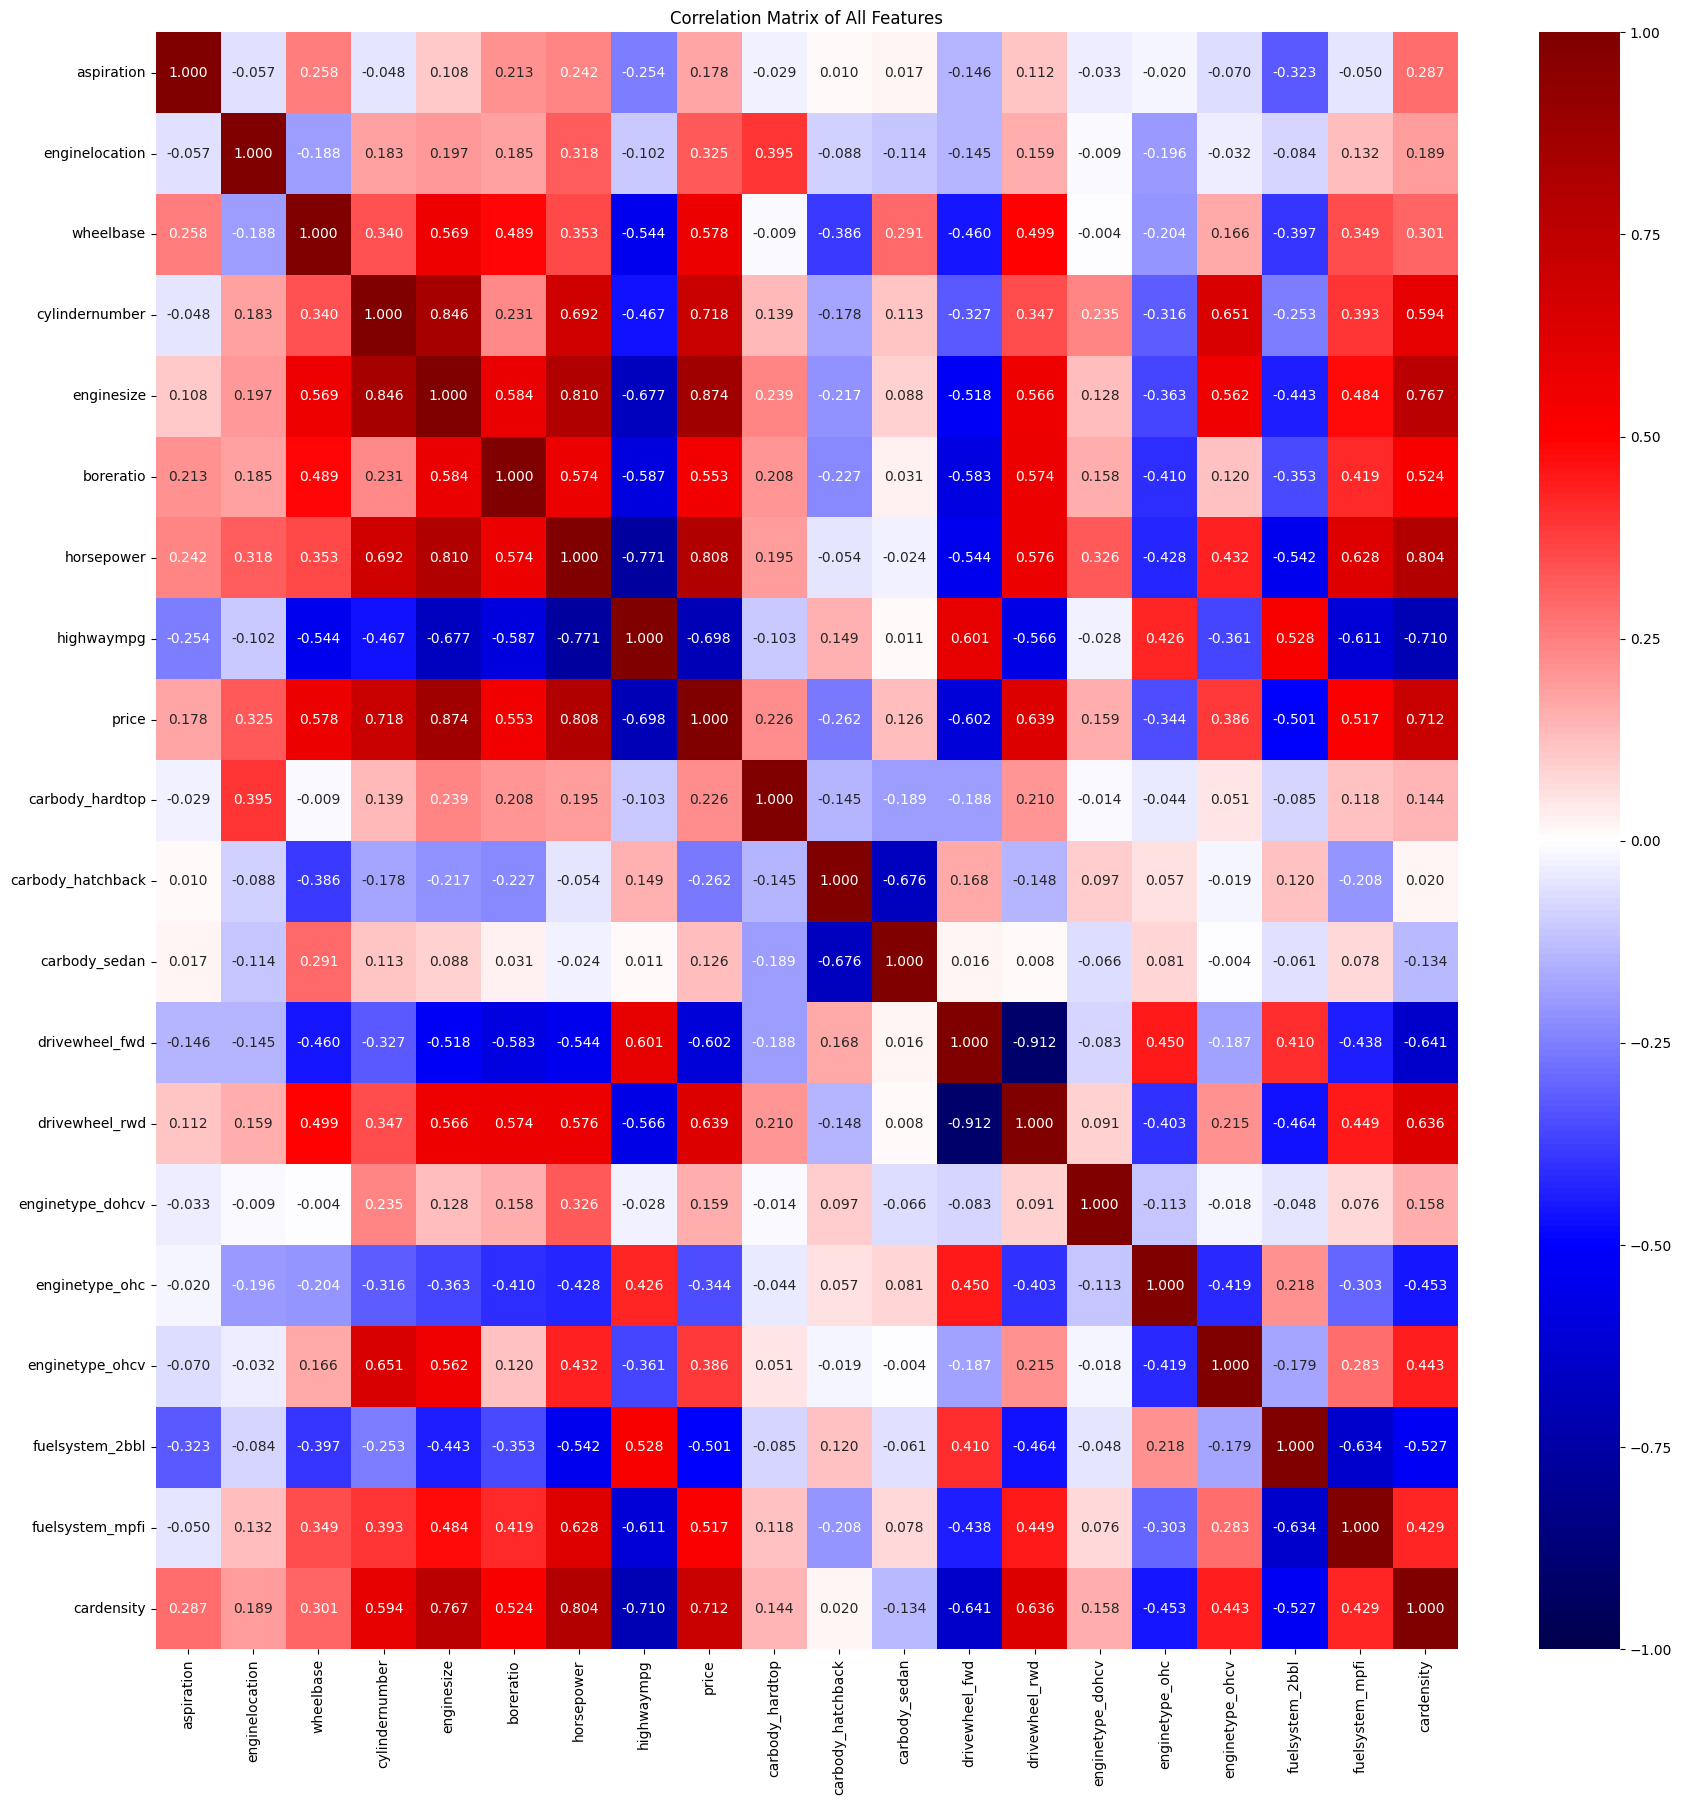

In [264]:
# --- Compute correlation matrix ---
corr_matrix = df.corr()

# --- Display heatmap emphasizing strong correlations (both negative and positive) ---
plt.figure(figsize=(21,21))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="seismic", center=0, vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix of All Features")
plt.show()


In [265]:
pd.set_option('display.max_columns', None)
df.describe()

,aspiration,enginelocation,wheelbase,cylindernumber,enginesize,boreratio,horsepower,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_ohc,enginetype_ohcv,fuelsystem_2bbl,fuelsystem_mpfi,cardensity
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.180488,0.014634,98.756585,4.380488,126.907317,3.329756,104.117073,30.751220,13276.710571,0.039024,0.341463,0.468293,0.585366,0.370732,0.004878,0.721951,0.063415,0.321951,0.458537,0.004111
std,0.385535,0.120377,6.021776,1.080854,41.642693,0.270844,39.544167,6.886443,7988.852332,0.194127,0.475361,0.500215,0.493865,0.484183,0.069843,0.449134,0.244304,0.468368,0.499498,0.000505
min,0.000000,0.000000,86.600000,2.000000,61.000000,2.540000,48.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003287
25%,0.000000,0.000000,94.500000,4.000000,97.000000,3.150000,70.000000,25.000000,7788.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003724
50%,0.000000,0.000000,97.000000,4.000000,120.000000,3.310000,95.000000,30.000000,10295.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.004012
75%,0.000000,0.000000,102.400000,4.000000,141.000000,3.580000,116.000000,34.000000,16503.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.004377
max,1.000000,1.000000,120.900000,12.000000,326.000000,3.940000,288.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.006106


In [266]:
# --- Feature Scaling (Standardization) ---
# Select continuous numeric features to scale
cols_to_scale = [
    'wheelbase', 'enginesize', 'boreratio', 'horsepower','highwaympg', 'cardensity'
]

# Apply z-score standardization
df[cols_to_scale] = (df[cols_to_scale] - df[cols_to_scale].mean()) / df[cols_to_scale].std()


**Preparation of data**

In [267]:
# Shuffle dataset(deals with any similar trend in data)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 80-20 split
split_index = int(0.8 * len(df_shuffled))
train_df = df_shuffled.iloc[:split_index]
test_df = df_shuffled.iloc[split_index:]

# Separate features and target
X_train = train_df.drop('price', axis=1).values
y_train = train_df['price'].values.reshape(-1, 1)

X_test = test_df.drop('price', axis=1).values
y_test = test_df['price'].values.reshape(-1, 1)

# Add bias term (column of 1s)
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

n_samples, n_features = X_train.shape

**Model**

In [268]:
# -----------------------------
# 2. Initialize Weights & Hyperparameters
# -----------------------------
np.random.seed(42)
weights = np.random.randn(n_features, 1) * 0.01  # small random weights
learning_rate = 0.01
iterations = 100000

In [269]:
# Track weight and loss history
weights_history = np.zeros((iterations, n_features))
loss_history = []

In [270]:
# -----------------------------
# 3. Gradient Descent
# -----------------------------
for i in range(iterations):
    y_pred = X_train @ weights
    error = y_pred - y_train
    loss = (1 / (2 * n_samples)) * np.sum(error ** 2)
    loss_history.append(loss)
    
    gradient = (1 / n_samples) * (X_train.T @ error)
    weights -= learning_rate * gradient
    weights_history[i] = weights.flatten()


In [271]:
# -----------------------------
# 4. Predictions on Train & Test
# -----------------------------
y_train_pred = X_train @ weights
y_test_pred = X_test @ weights


In [272]:
# -----------------------------
# 5. Evaluation Metrics
# -----------------------------
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Compute metrics
print("TRAIN METRICS:")
print("R2:", round(r2_score(y_train, y_train_pred), 4))
print("RMSE:", round(rmse(y_train, y_train_pred), 4))
print("MAE:", round(mae(y_train, y_train_pred), 4))

print("\nTEST METRICS:")
print("R2:", round(r2_score(y_test, y_test_pred), 4))
print("RMSE:", round(rmse(y_test, y_test_pred), 4))
print("MAE:", round(mae(y_test, y_test_pred), 4))

TRAIN METRICS:
R2: 0.8702
RMSE: 2779.84
MAE: 1913.7093

TEST METRICS:
R2: 0.8188
RMSE: 3747.9592
MAE: 2602.3148


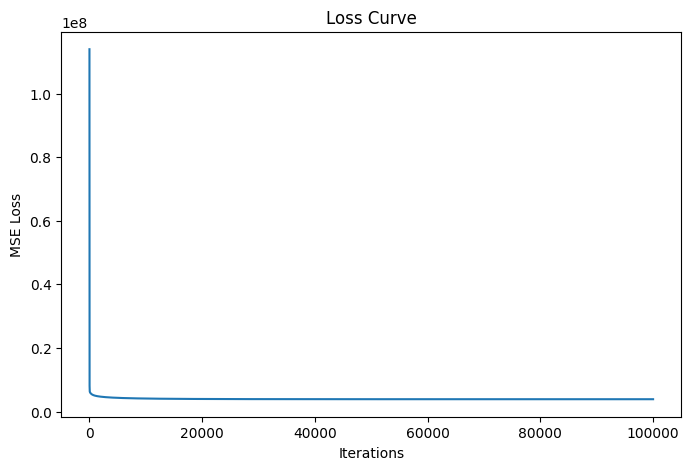

In [273]:
plt.figure(figsize=(8,5))
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.show()
